In [1]:
## Importing libraries
import boto3
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt 
import variable_engineering as ve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 200)

In [ ]:
# ## Reading cleaned data from MiceForest Imputer
# train = pd.read_csv('/home/ec2-user/SageMaker/Analytics_Data_Science/American_Express/Evan/amex_train_cleaned.csv')
# test = pd.read_csv('/home/ec2-user/SageMaker/Analytics_Data_Science/American_Express/Evan/amex_test_cleaned.csv')

# ## Printing the first five observations
# train.head()

In [2]:
## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'evan-callaghan-bucket'
bucket = s3.Bucket(bucket_name)

file_key = 'Kaggle-American-Express-Default/amex_train_data.csv'
file_key2 = 'Kaggle-American-Express-Default/amex_train_labels.csv'

bucket_object = bucket.Object(file_key)
bucket_object2 = bucket.Object(file_key2)

file_object = bucket_object.get()
file_object2 = bucket_object2.get()

file_content_stream = file_object.get('Body')
file_content_stream2 = file_object2.get('Body')

## Creating data-type dictionary for reading the train data-frame
dtype_dict = {'customer_ID': "object", 'S_2': "object", 'P_2': 'float16', 'D_39': 'float16', 'B_1': 'float16','B_2': 'float16', 'R_1': 'float16','S_3': 'float16','D_41': 'float16','B_3': 'float16','D_42': 'float16','D_43': 'float16','D_44': 'float16', 'B_4': 'float16','D_45': 'float16','B_5': 'float16','R_2': 'float16','D_46': 'float16','D_47': 'float16','D_48': 'float16', 'D_49': 'float16','B_6': 'float16','B_7': 'float16','B_8': 'float16','D_50': 'float16','D_51': 'float16','B_9': 'float16', 'R_3': 'float16','D_52': 'float16','P_3': 'float16','B_10': 'float16','D_53': 'float16','S_5': 'float16','B_11': 'float16', 'S_6': 'float16','D_54': 'float16','R_4': 'float16','S_7': 'float16','B_12': 'float16','S_8': 'float16','D_55': 'float16', 'D_56': 'float16','B_13': 'float16','R_5': 'float16','D_58': 'float16','S_9': 'float16','B_14': 'float16','D_59': 'float16', 'D_60': 'float16','D_61': 'float16','B_15': 'float16','S_11': 'float16','D_62': 'float16','D_63': 'object','D_64': 'object', 'D_65': 'float16','B_16': 'float16','B_17': 'float16','B_18': 'float16','B_19': 'float16','D_66': 'float16','B_20': 'float16', 'D_68': 'float16','S_12': 'float16','R_6': 'float16','S_13': 'float16','B_21': 'float16','D_69': 'float16','B_22': 'float16', 'D_70': 'float16','D_71': 'float16','D_72': 'float16','S_15': 'float16','B_23': 'float16','D_73': 'float16','P_4': 'float16', 'D_74': 'float16','D_75': 'float16','D_76': 'float16','B_24': 'float16','R_7': 'float16','D_77': 'float16','B_25': 'float16', 'B_26': 'float16','D_78': 'float16','D_79': 'float16','R_8': 'float16','R_9': 'float16','S_16': 'float16','D_80': 'float16', 'R_10': 'float16','R_11': 'float16','B_27': 'float16','D_81': 'float16','D_82': 'float16','S_17': 'float16','R_12': 'float16', 'B_28': 'float16','R_13': 'float16','D_83': 'float16','R_14': 'float16','R_15': 'float16','D_84': 'float16','R_16': 'float16', 'B_29': 'float16','B_30': 'float16','S_18': 'float16','D_86': 'float16','D_87': 'float16','R_17': 'float16','R_18': 'float16', 'D_88': 'float16','B_31': 'int64','S_19': 'float16','R_19': 'float16','B_32': 'float16','S_20': 'float16','R_20': 'float16', 'R_21': 'float16','B_33': 'float16','D_89': 'float16','R_22': 'float16','R_23': 'float16','D_91': 'float16','D_92': 'float16', 'D_93': 'float16','D_94': 'float16','R_24': 'float16','R_25': 'float16','D_96': 'float16','S_22': 'float16','S_23': 'float16', 'S_24': 'float16','S_25': 'float16','S_26': 'float16','D_102': 'float16','D_103': 'float16','D_104': 'float16','D_105': 'float16', 'D_106': 'float16','D_107': 'float16','B_36': 'float16','B_37': 'float16', 'R_26': 'float16','R_27': 'float16','B_38': 'float16', 'D_108': 'float16','D_109': 'float16','D_110': 'float16','D_111': 'float16','B_39': 'float16','D_112': 'float16','B_40': 'float16', 'S_27': 'float16','D_113': 'float16','D_114': 'float16','D_115': 'float16','D_116': 'float16','D_117': 'float16','D_118': 'float16', 'D_119': 'float16','D_120': 'float16','D_121': 'float16','D_122': 'float16','D_123': 'float16','D_124': 'float16','D_125': 'float16', 'D_126': 'float16','D_127': 'float16','D_128': 'float16','D_129': 'float16','B_41': 'float16','B_42': 'float16','D_130': 'float16', 'D_131': 'float16','D_132': 'float16','D_133': 'float16','R_28': 'float16','D_134': 'float16','D_135': 'float16','D_136': 'float16', 'D_137': 'float16','D_138': 'float16','D_139': 'float16','D_140': 'float16','D_141': 'float16','D_142': 'float16','D_143': 'float16', 'D_144': 'float16','D_145': 'float16'}

## Reading the data
train = pd.read_csv(file_content_stream, dtype = dtype_dict)
labels = pd.read_csv(file_content_stream2, dtype = dtype_dict)

## Subsetting the data for Payment and Spend variables
train = train[['customer_ID', 'P_2', 'P_3', 'P_4', 'S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
               'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']]

## Appending target variables
train = pd.merge(train, labels, on = 'customer_ID', how = 'left')

## Printing the first five observations
train.head()

,customer_ID,P_2,P_3,P_4,S_3,S_5,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938477,0.736328,0.007553,0.124023,0.023376,0.008324,0.161377,0.922852,0.065735,0.401611,0.271973,0.515137,0.108276,0.002272,0.008034,0.005722,0.002537,0.009705,0.894043,0.135620,0.911133,0.974609,0.001244,0.676758,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936523,0.720703,0.004833,0.126709,0.030594,0.002481,0.140991,0.919434,0.093933,0.406250,0.188965,0.509277,0.101013,0.009811,0.000761,0.007584,0.008430,0.009926,0.902344,0.136353,0.919922,0.975586,0.004562,0.822266,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.954102,0.738281,0.006561,0.123962,0.048370,0.000530,0.112244,1.001953,0.084778,0.406738,0.495361,0.679199,0.103210,0.009361,0.004055,0.005901,0.007328,0.008446,0.939453,0.134888,0.958496,0.974121,0.011734,0.853516,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.960449,0.741699,0.009560,0.117188,0.030060,0.000783,0.102844,0.704102,0.048370,0.405273,0.508789,0.515137,0.206421,0.004875,0.006969,0.002520,0.007053,0.006615,0.913086,0.140015,0.926270,0.975586,0.007572,0.844727,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.947266,0.691895,0.008156,0.117310,0.054230,0.006699,0.094299,0.916992,0.039246,0.487549,0.216553,0.507812,0.106018,0.007446,0.001770,0.000155,0.007729,0.005512,0.920898,0.131592,0.933594,0.978027,0.018204,0.811035,0


## Variable Engineering:

### Payment Variables

In [3]:
p_variables = train.columns
[x for x in p_variables if x.startswith('P_')]

['P_2', 'P_3', 'P_4']

<AxesSubplot:xlabel='target', ylabel='P_4'>

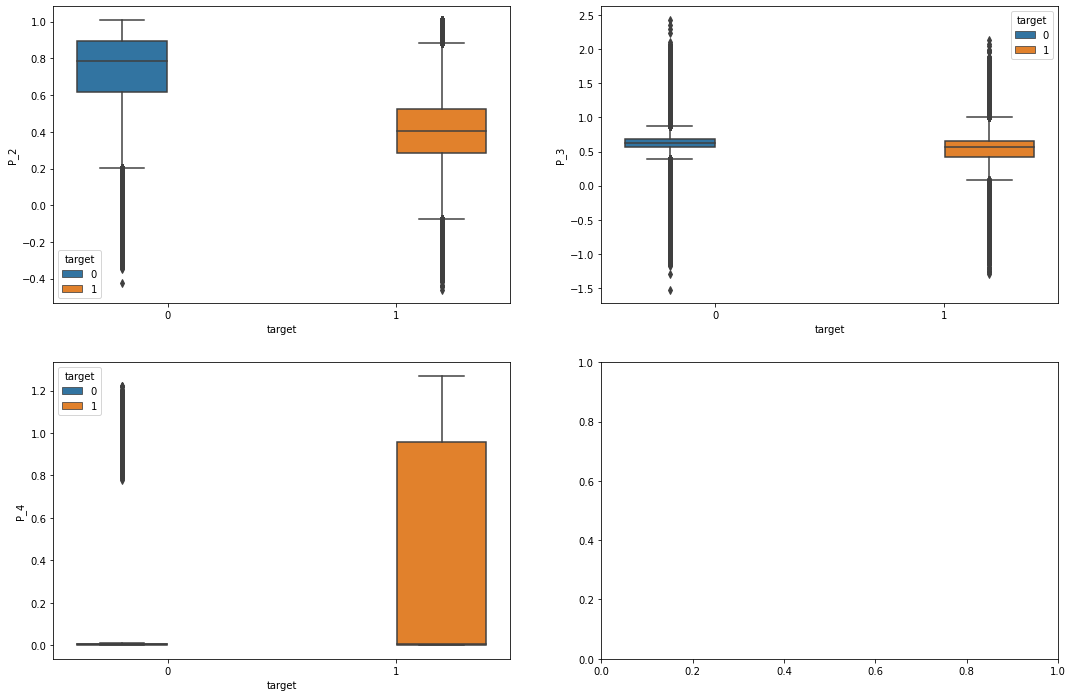

In [13]:
fig, axes = plt.subplots(2, 2, figsize = (18, 12))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'P_2', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'P_3', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'P_4', hue = 'target', data = train)

In [14]:
## Mean of 'P' variables
mean_value = train.groupby('customer_ID')[['P_2', 'P_3', 'P_4']].mean().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_means = mean_value.merge(target, how = 'left', on = 'customer_ID')
target_means.columns = ['customer_ID', 'P_2_mean', 'P_3_mean', 'P_4_mean', 'target']

## Median of 'P' variables
median_value = train.groupby('customer_ID')[['P_2', 'P_3', 'P_4']].median().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_medians = median_value.merge(target, how = 'left', on = 'customer_ID')
target_medians.columns = ['customer_ID', 'P_2_median', 'P_3_median', 'P_4_median', 'target']

## Sum of 'P' variables
sum_value = train.groupby('customer_ID')[['P_2', 'P_3', 'P_4']].sum().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_sums = sum_value.merge(target, how = 'left', on = 'customer_ID')
target_sums.columns = ['customer_ID', 'P_2_sum', 'P_3_sum', 'P_4_sum', 'target']

## STD of 'P' variables
std_value = train.groupby('customer_ID')[['P_2', 'P_3', 'P_4']].std().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_stds = std_value.merge(target, how = 'left', on = 'customer_ID')
target_stds.columns = ['customer_ID', 'P_2_std', 'P_3_std', 'P_4_std', 'target']

## Count of 'P' variables
count_value = train.groupby('customer_ID')[['P_2', 'P_3', 'P_4']].count().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_counts = count_value.merge(target, how = 'left', on = 'customer_ID')
target_counts.columns = ['customer_ID', 'P_2_count', 'P_3_count', 'P_4_count', 'target']

## MAD of 'P' variables
mad_value = train.groupby('customer_ID')[['P_2', 'P_3', 'P_4']].mad().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_mads = mad_value.merge(target, how = 'left', on = 'customer_ID')
target_mads.columns = ['customer_ID', 'P_2_mad', 'P_3_mad', 'P_4_mad', 'target']

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/pandas/core/nanops.py:146: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)


#### Mean:

<AxesSubplot:xlabel='target', ylabel='P_4_mean'>

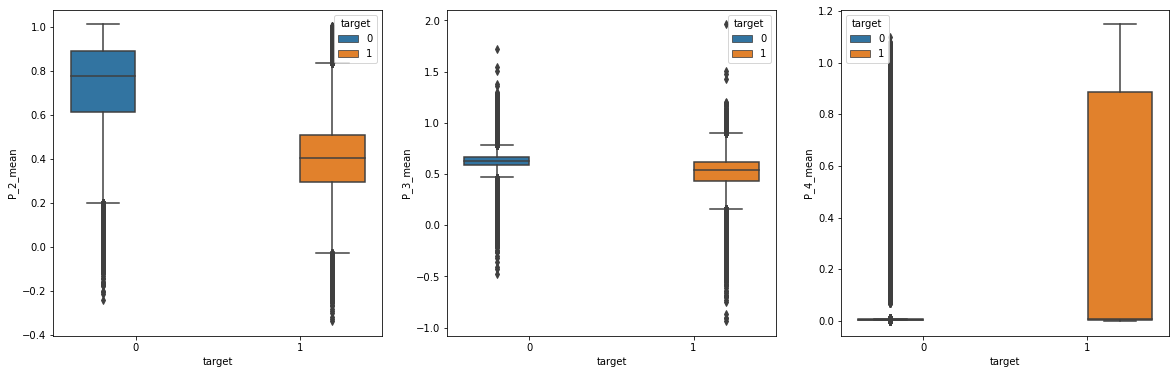

In [15]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

sns.boxplot(ax = axes[0], x = 'target', y = 'P_2_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[1], x = 'target', y = 'P_3_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[2], x = 'target', y = 'P_4_mean', hue = 'target', data = target_means)

#### Median:

<AxesSubplot:xlabel='target', ylabel='P_4_median'>

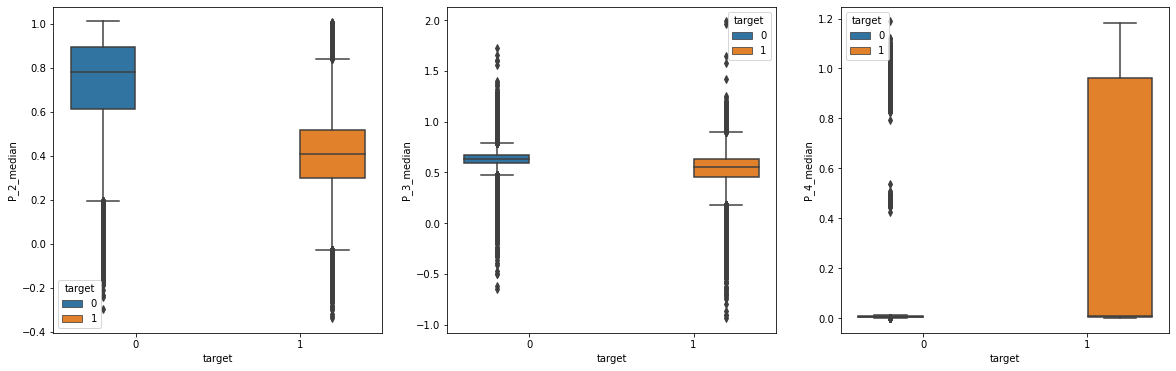

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

sns.boxplot(ax = axes[0], x = 'target', y = 'P_2_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[1], x = 'target', y = 'P_3_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[2], x = 'target', y = 'P_4_median', hue = 'target', data = target_medians)

#### Sum:

<AxesSubplot:xlabel='target', ylabel='P_4_sum'>

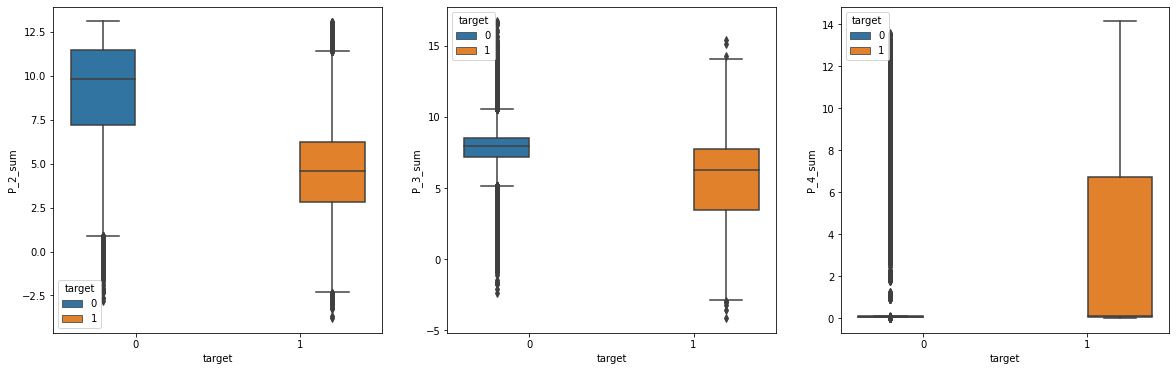

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

sns.boxplot(ax = axes[0], x = 'target', y = 'P_2_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1], x = 'target', y = 'P_3_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[2], x = 'target', y = 'P_4_sum', hue = 'target', data = target_sums)

#### Standard Deviation:

<AxesSubplot:xlabel='target', ylabel='P_4_std'>

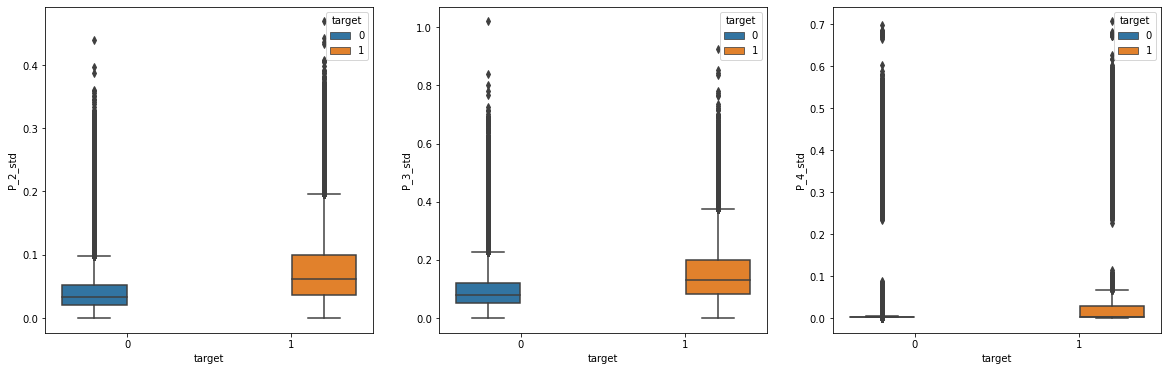

In [18]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

sns.boxplot(ax = axes[0], x = 'target', y = 'P_2_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[1], x = 'target', y = 'P_3_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[2], x = 'target', y = 'P_4_std', hue = 'target', data = target_stds)

#### MAD:

<AxesSubplot:xlabel='target', ylabel='P_4_mad'>

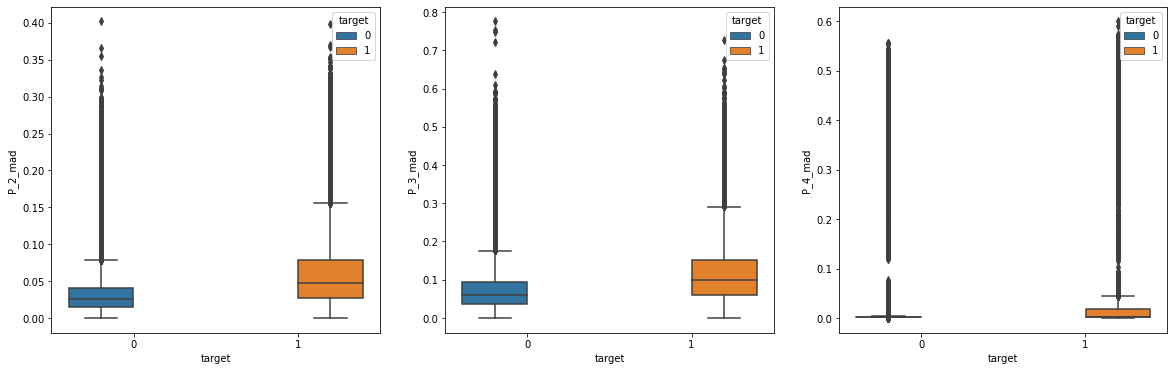

In [19]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

sns.boxplot(ax = axes[0], x = 'target', y = 'P_2_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[1], x = 'target', y = 'P_3_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[2], x = 'target', y = 'P_4_mad', hue = 'target', data = target_mads)

#### Count:

<AxesSubplot:xlabel='target', ylabel='P_4_count'>

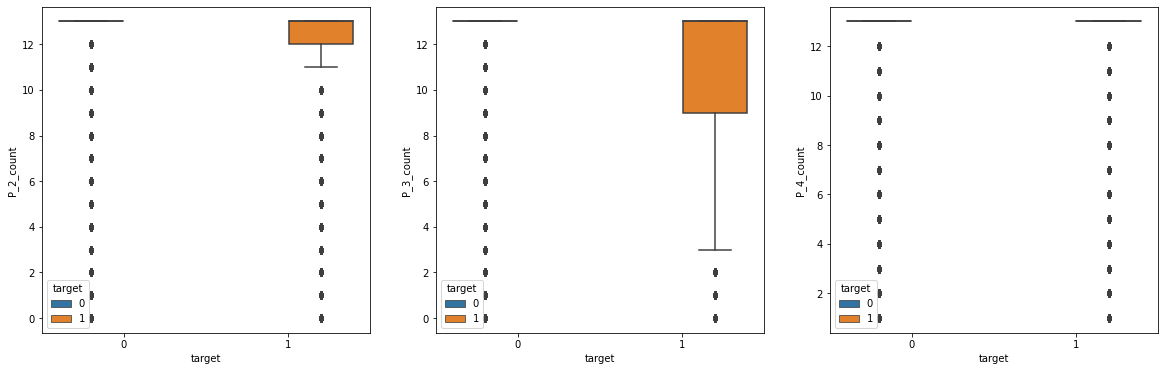

In [20]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

sns.boxplot(ax = axes[0], x = 'target', y = 'P_2_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[1], x = 'target', y = 'P_3_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[2], x = 'target', y = 'P_4_count', hue = 'target', data = target_counts)

### Spend Variables

In [4]:
s_variables = train.columns
[x for x in s_variables if x.startswith('S_')]

['S_3',
 'S_5',
 'S_6',
 'S_7',
 'S_8',
 'S_9',
 'S_11',
 'S_12',
 'S_13',
 'S_15',
 'S_16',
 'S_17',
 'S_18',
 'S_19',
 'S_20',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'S_27']

<AxesSubplot:xlabel='target', ylabel='S_27'>

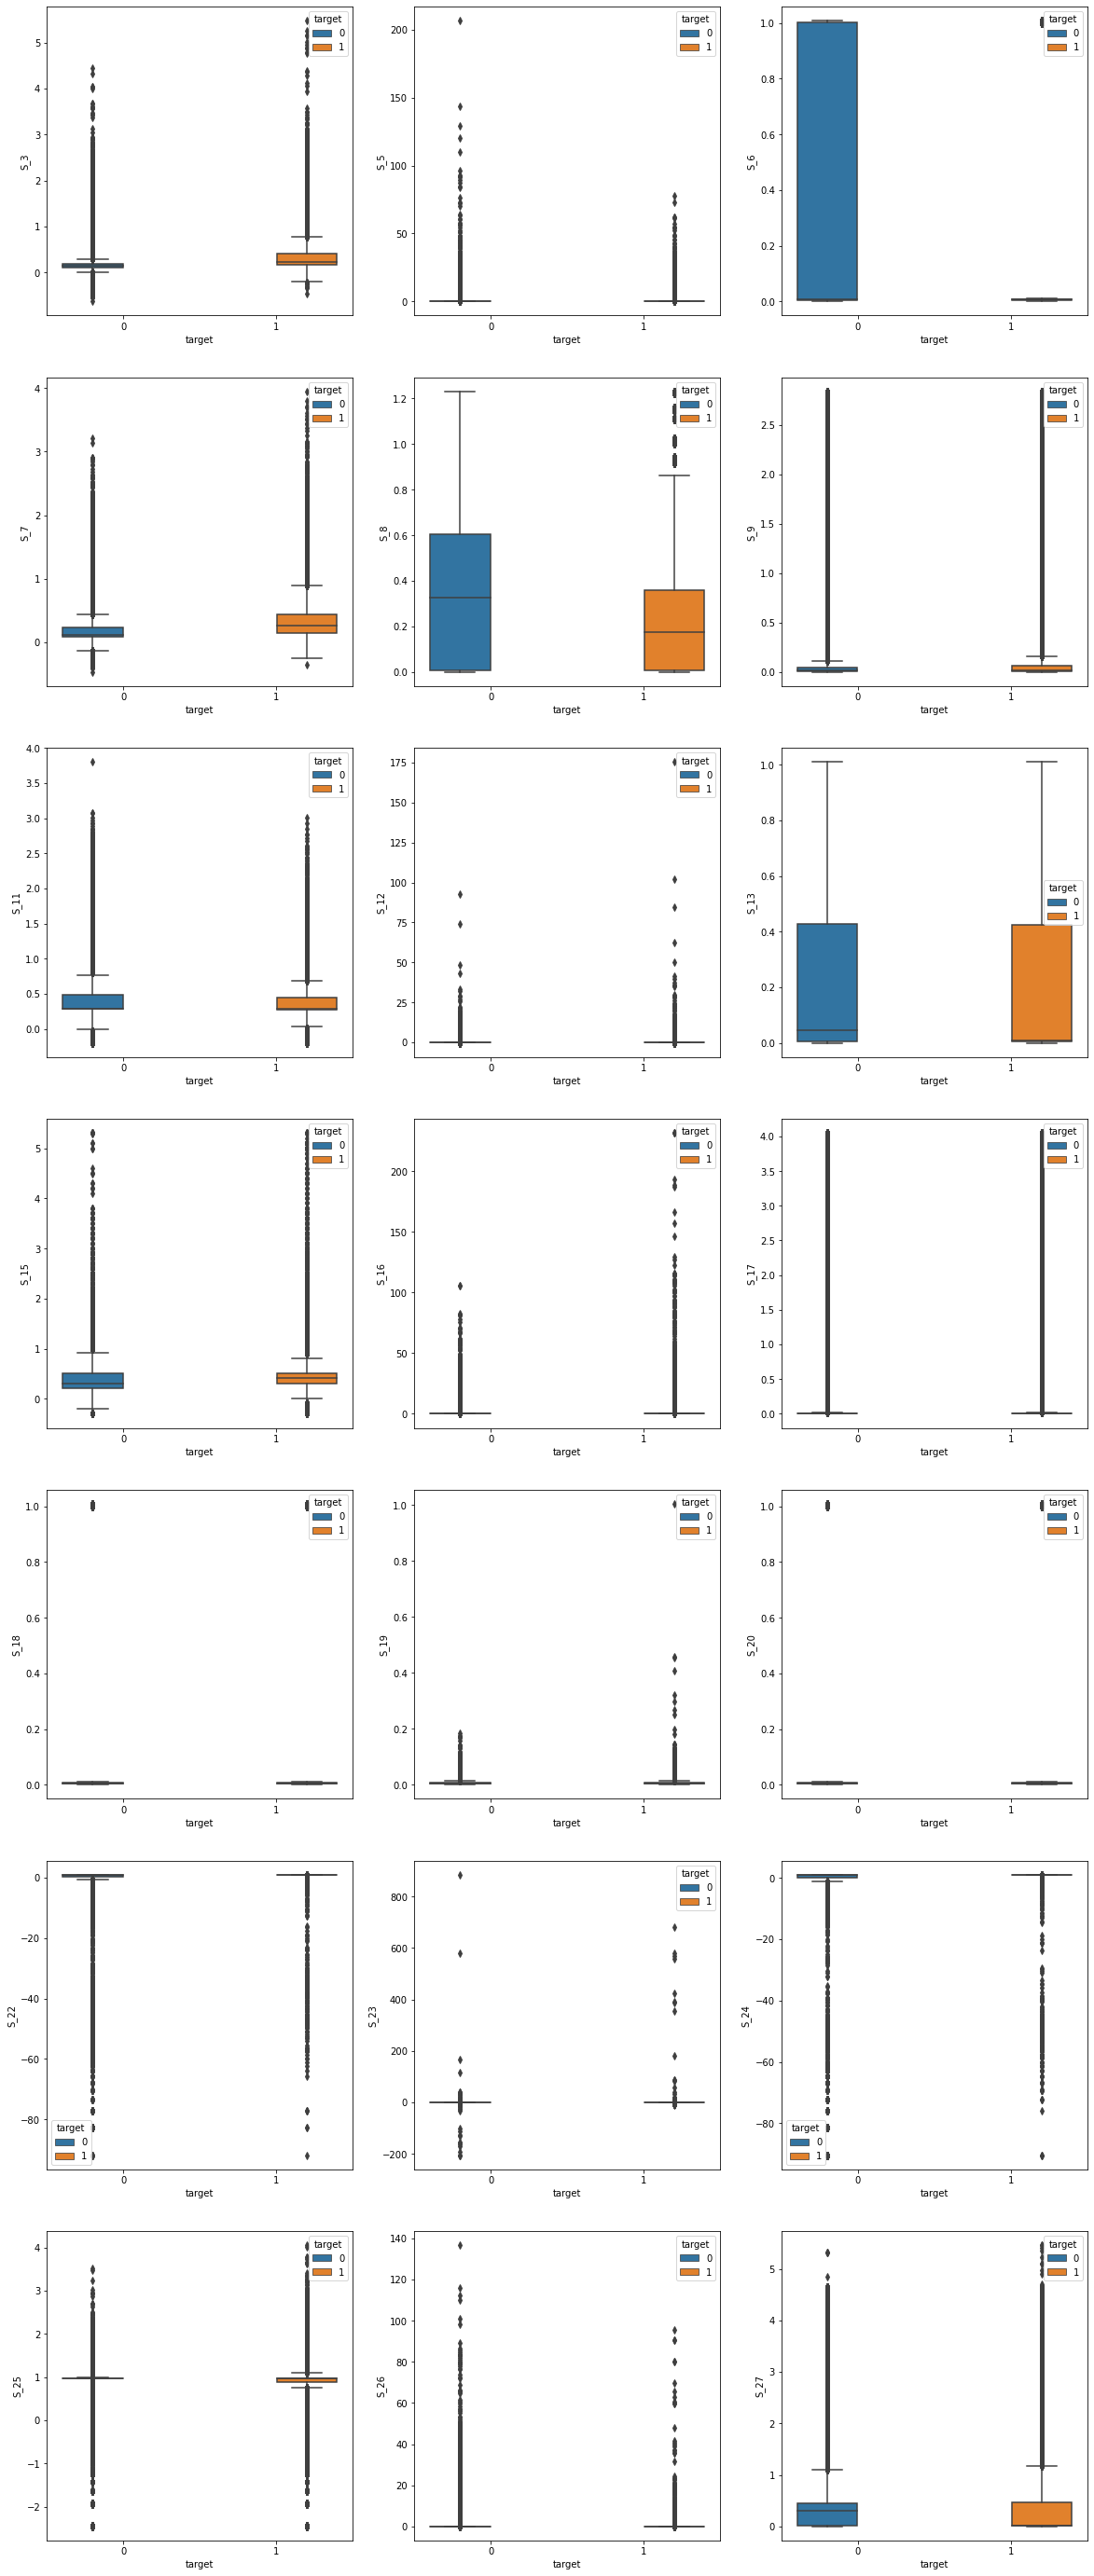

In [5]:
## Creating a new figure
fig, axes = plt.subplots(7, 3, figsize = (20, 50))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 2], x = 'target', y = 'S_6', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_7', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_8', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 2], x = 'target', y = 'S_9', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_11', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_12', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 2], x = 'target', y = 'S_13', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_15', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_16', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 2], x = 'target', y = 'S_17', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_18', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_19', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 2], x = 'target', y = 'S_20', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_22', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_23', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 2], x = 'target', y = 'S_24', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_25', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_26', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 2], x = 'target', y = 'S_27', hue = 'target', data = train)

In [6]:
## Mean of 'S' variables
mean_value = train.groupby('customer_ID')[['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 
                                          'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
                                          'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 
                                          'S_25', 'S_26', 'S_27']].mean().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_means = mean_value.merge(target, how = 'left', on = 'customer_ID')
target_means.columns = ['customer_ID', 'S_3_mean', 'S_5_mean', 'S_6_mean', 'S_7_mean', 'S_8_mean', 'S_9_mean', 
                                          'S_11_mean', 'S_12_mean', 'S_13_mean', 'S_15_mean', 'S_16_mean', 'S_17_mean', 
                                          'S_18_mean', 'S_19_mean', 'S_20_mean', 'S_22_mean', 'S_23_mean', 'S_24_mean', 
                                          'S_25_mean', 'S_26_mean', 'S_27_mean', 'target']

## Median of 'S' variables
median_value = train.groupby('customer_ID')[['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 
                                          'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
                                          'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 
                                          'S_25', 'S_26', 'S_27']].median().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_medians = median_value.merge(target, how = 'left', on = 'customer_ID')
target_medians.columns = ['customer_ID', 'S_3_median', 'S_5_median', 'S_6_median', 'S_7_median', 'S_8_median', 'S_9_median', 
                                          'S_11_median', 'S_12_median', 'S_13_median', 'S_15_median', 'S_16_median', 'S_17_median', 
                                          'S_18_median', 'S_19_median', 'S_20_median', 'S_22_median', 'S_23_median', 'S_24_median', 
                                          'S_25_median', 'S_26_median', 'S_27_median', 'target']

## Sum of 'S' variables
sum_value = train.groupby('customer_ID')[['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 
                                          'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
                                          'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 
                                          'S_25', 'S_26', 'S_27']].sum().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_sums = sum_value.merge(target, how = 'left', on = 'customer_ID')
target_sums.columns = ['customer_ID', 'S_3_sum', 'S_5_sum', 'S_6_sum', 'S_7_sum', 'S_8_sum', 'S_9_sum', 
                                          'S_11_sum', 'S_12_sum', 'S_13_sum', 'S_15_sum', 'S_16_sum', 'S_17_sum', 
                                          'S_18_sum', 'S_19_sum', 'S_20_sum', 'S_22_sum', 'S_23_sum', 'S_24_sum', 
                                          'S_25_sum', 'S_26_sum', 'S_27_sum', 'target']

## STD of 'S' variables
std_value = train.groupby('customer_ID')[['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 
                                          'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
                                          'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 
                                          'S_25', 'S_26', 'S_27']].std().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_stds = std_value.merge(target, how = 'left', on = 'customer_ID')
target_stds.columns = ['customer_ID', 'S_3_std', 'S_5_std', 'S_6_std', 'S_7_std', 'S_8_std', 'S_9_std', 
                                          'S_11_std', 'S_12_std', 'S_13_std', 'S_15_std', 'S_16_std', 'S_17_std', 
                                          'S_18_std', 'S_19_std', 'S_20_std', 'S_22_std', 'S_23_std', 'S_24_std', 
                                          'S_25_std', 'S_26_std', 'S_27_std', 'target']

## Count of 'S' variables
count_value = train.groupby('customer_ID')[['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 
                                          'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
                                          'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 
                                          'S_25', 'S_26', 'S_27']].count().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_counts = count_value.merge(target, how = 'left', on = 'customer_ID')
target_counts.columns = ['customer_ID', 'S_3_count', 'S_5_count', 'S_6_count', 'S_7_count', 'S_8_count', 'S_9_count', 
                                          'S_11_count', 'S_12_count', 'S_13_count', 'S_15_count', 'S_16_count', 'S_17_count', 
                                          'S_18_count', 'S_19_count', 'S_20_count', 'S_22_count', 'S_23_count', 'S_24_count', 
                                          'S_25_count', 'S_26_count', 'S_27_count', 'target']

## MAD of 'S' variables
mad_value = train.groupby('customer_ID')[['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 
                                          'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
                                          'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 
                                          'S_25', 'S_26', 'S_27']].mad().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_mads = mad_value.merge(target, how = 'left', on = 'customer_ID')
target_mads.columns = ['customer_ID', 'S_3_mad', 'S_5_mad', 'S_6_mad', 'S_7_mad', 'S_8_mad', 'S_9_mad', 
                                          'S_11_mad', 'S_12_mad', 'S_13_mad', 'S_15_mad', 'S_16_mad', 'S_17_mad', 
                                          'S_18_mad', 'S_19_mad', 'S_20_mad', 'S_22_mad', 'S_23_mad', 'S_24_mad', 
                                          'S_25_mad', 'S_26_mad', 'S_27_mad', 'target']

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/pandas/core/nanops.py:146: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)


#### Mean:

<AxesSubplot:xlabel='target', ylabel='S_27_mean'>

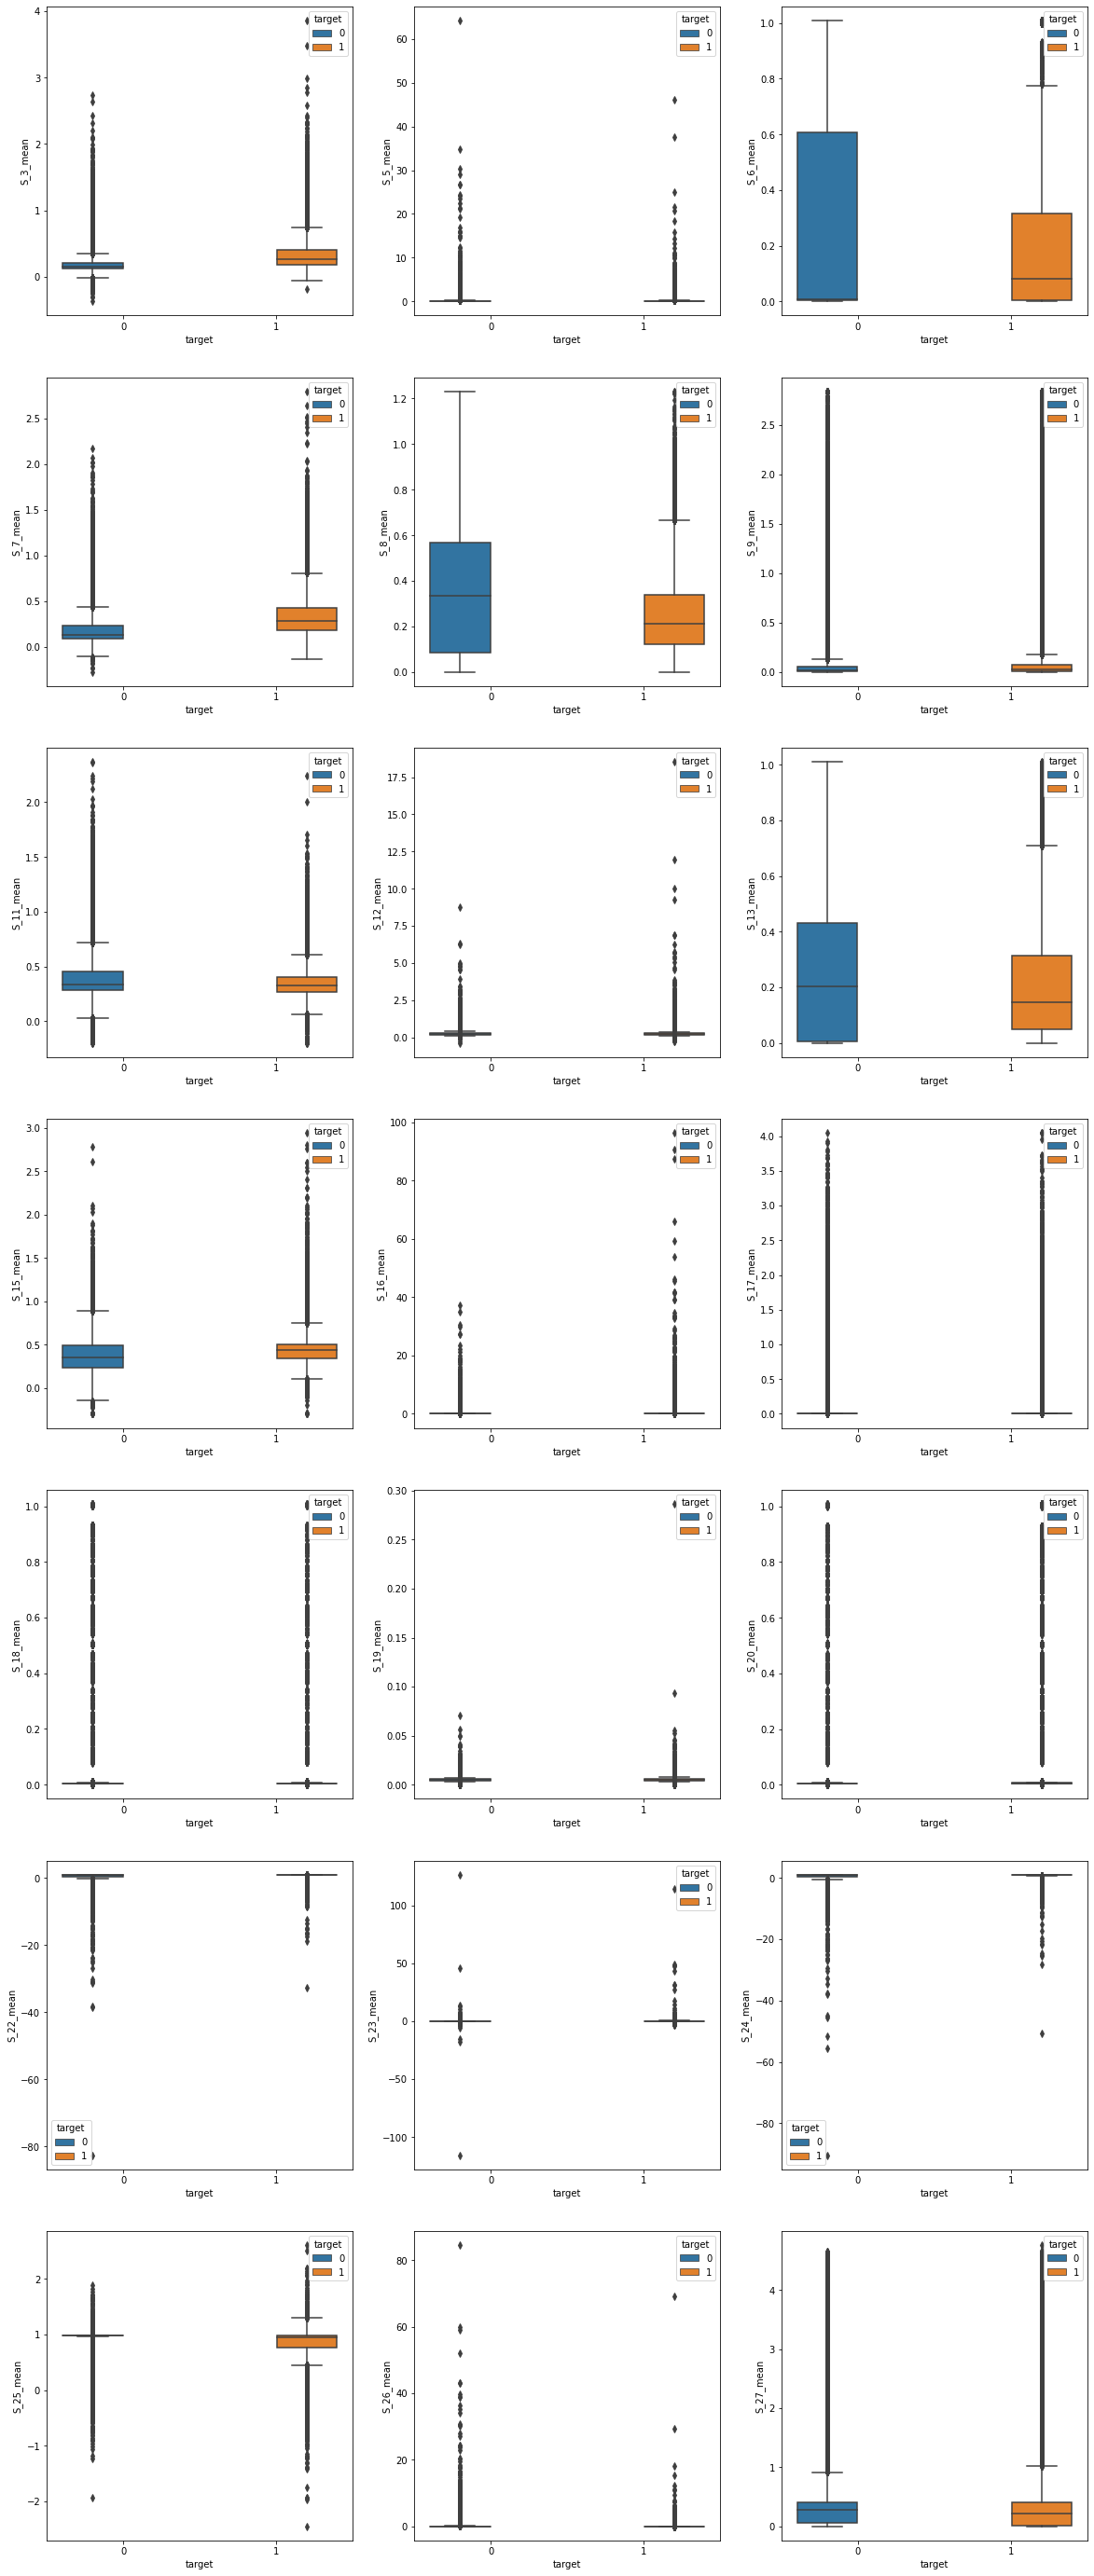

In [7]:
fig, axes = plt.subplots(7, 3, figsize = (20, 50))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[0, 2], x = 'target', y = 'S_6_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_7_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_8_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[1, 2], x = 'target', y = 'S_9_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_11_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_12_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[2, 2], x = 'target', y = 'S_13_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_15_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_16_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[3, 2], x = 'target', y = 'S_17_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_18_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_19_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[4, 2], x = 'target', y = 'S_20_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_22_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_23_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[5, 2], x = 'target', y = 'S_24_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_25_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_26_mean', hue = 'target', data = target_means)
sns.boxplot(ax = axes[6, 2], x = 'target', y = 'S_27_mean', hue = 'target', data = target_means)

#### Median:

<AxesSubplot:xlabel='target', ylabel='S_27_median'>

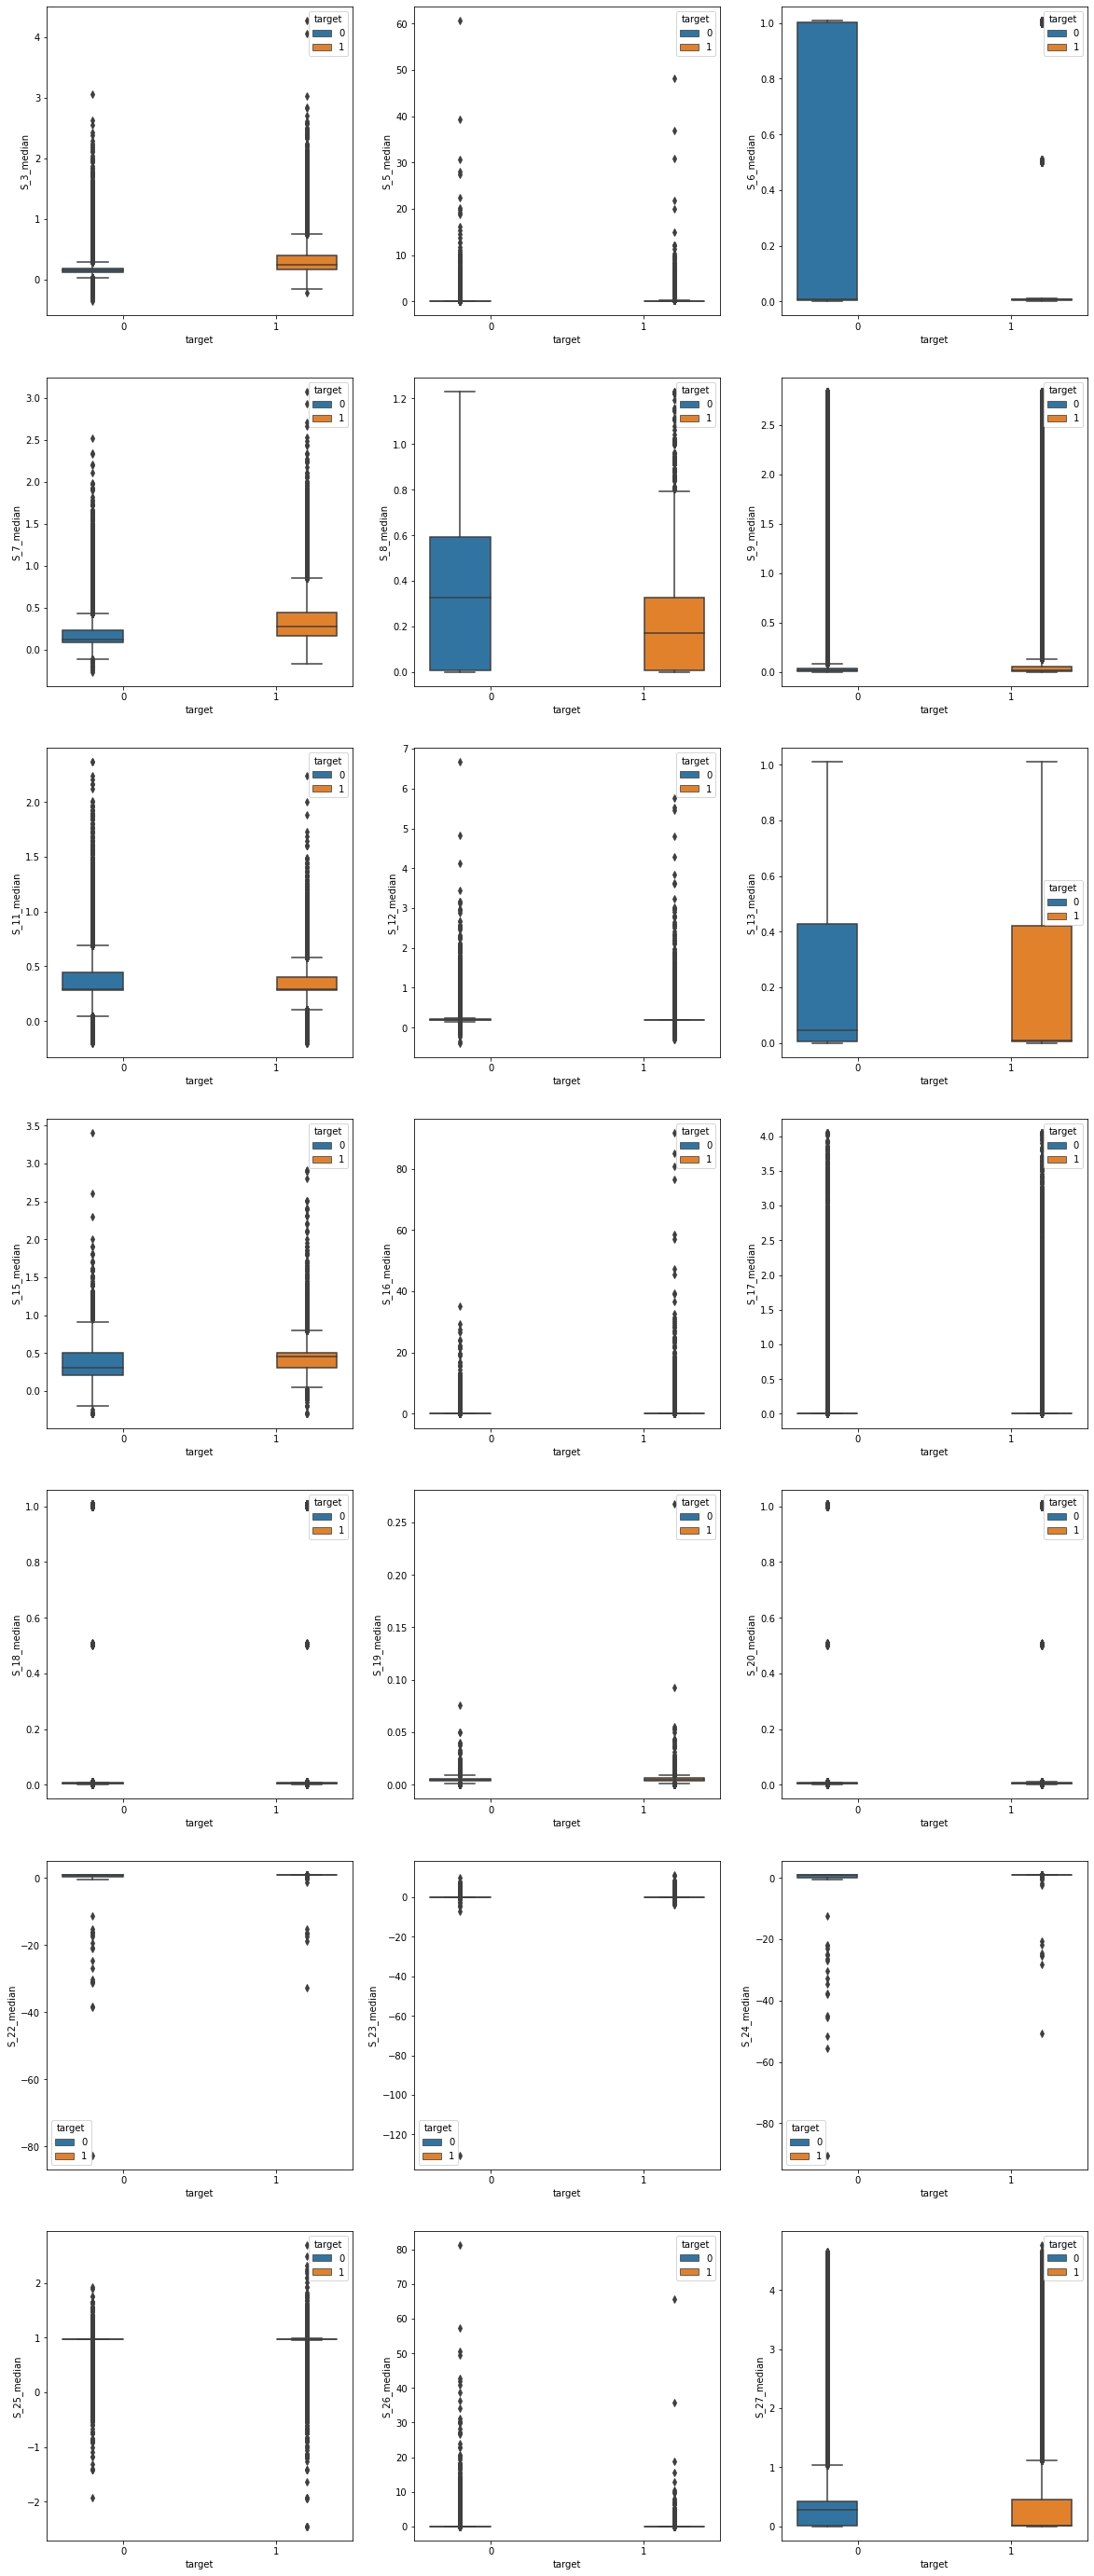

In [8]:
fig, axes = plt.subplots(7, 3, figsize = (20, 50))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[0, 2], x = 'target', y = 'S_6_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_7_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_8_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[1, 2], x = 'target', y = 'S_9_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_11_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_12_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[2, 2], x = 'target', y = 'S_13_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_15_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_16_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[3, 2], x = 'target', y = 'S_17_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_18_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_19_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[4, 2], x = 'target', y = 'S_20_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_22_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_23_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[5, 2], x = 'target', y = 'S_24_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_25_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_26_median', hue = 'target', data = target_medians)
sns.boxplot(ax = axes[6, 2], x = 'target', y = 'S_27_median', hue = 'target', data = target_medians)

#### Sum:

<AxesSubplot:xlabel='target', ylabel='S_27_sum'>

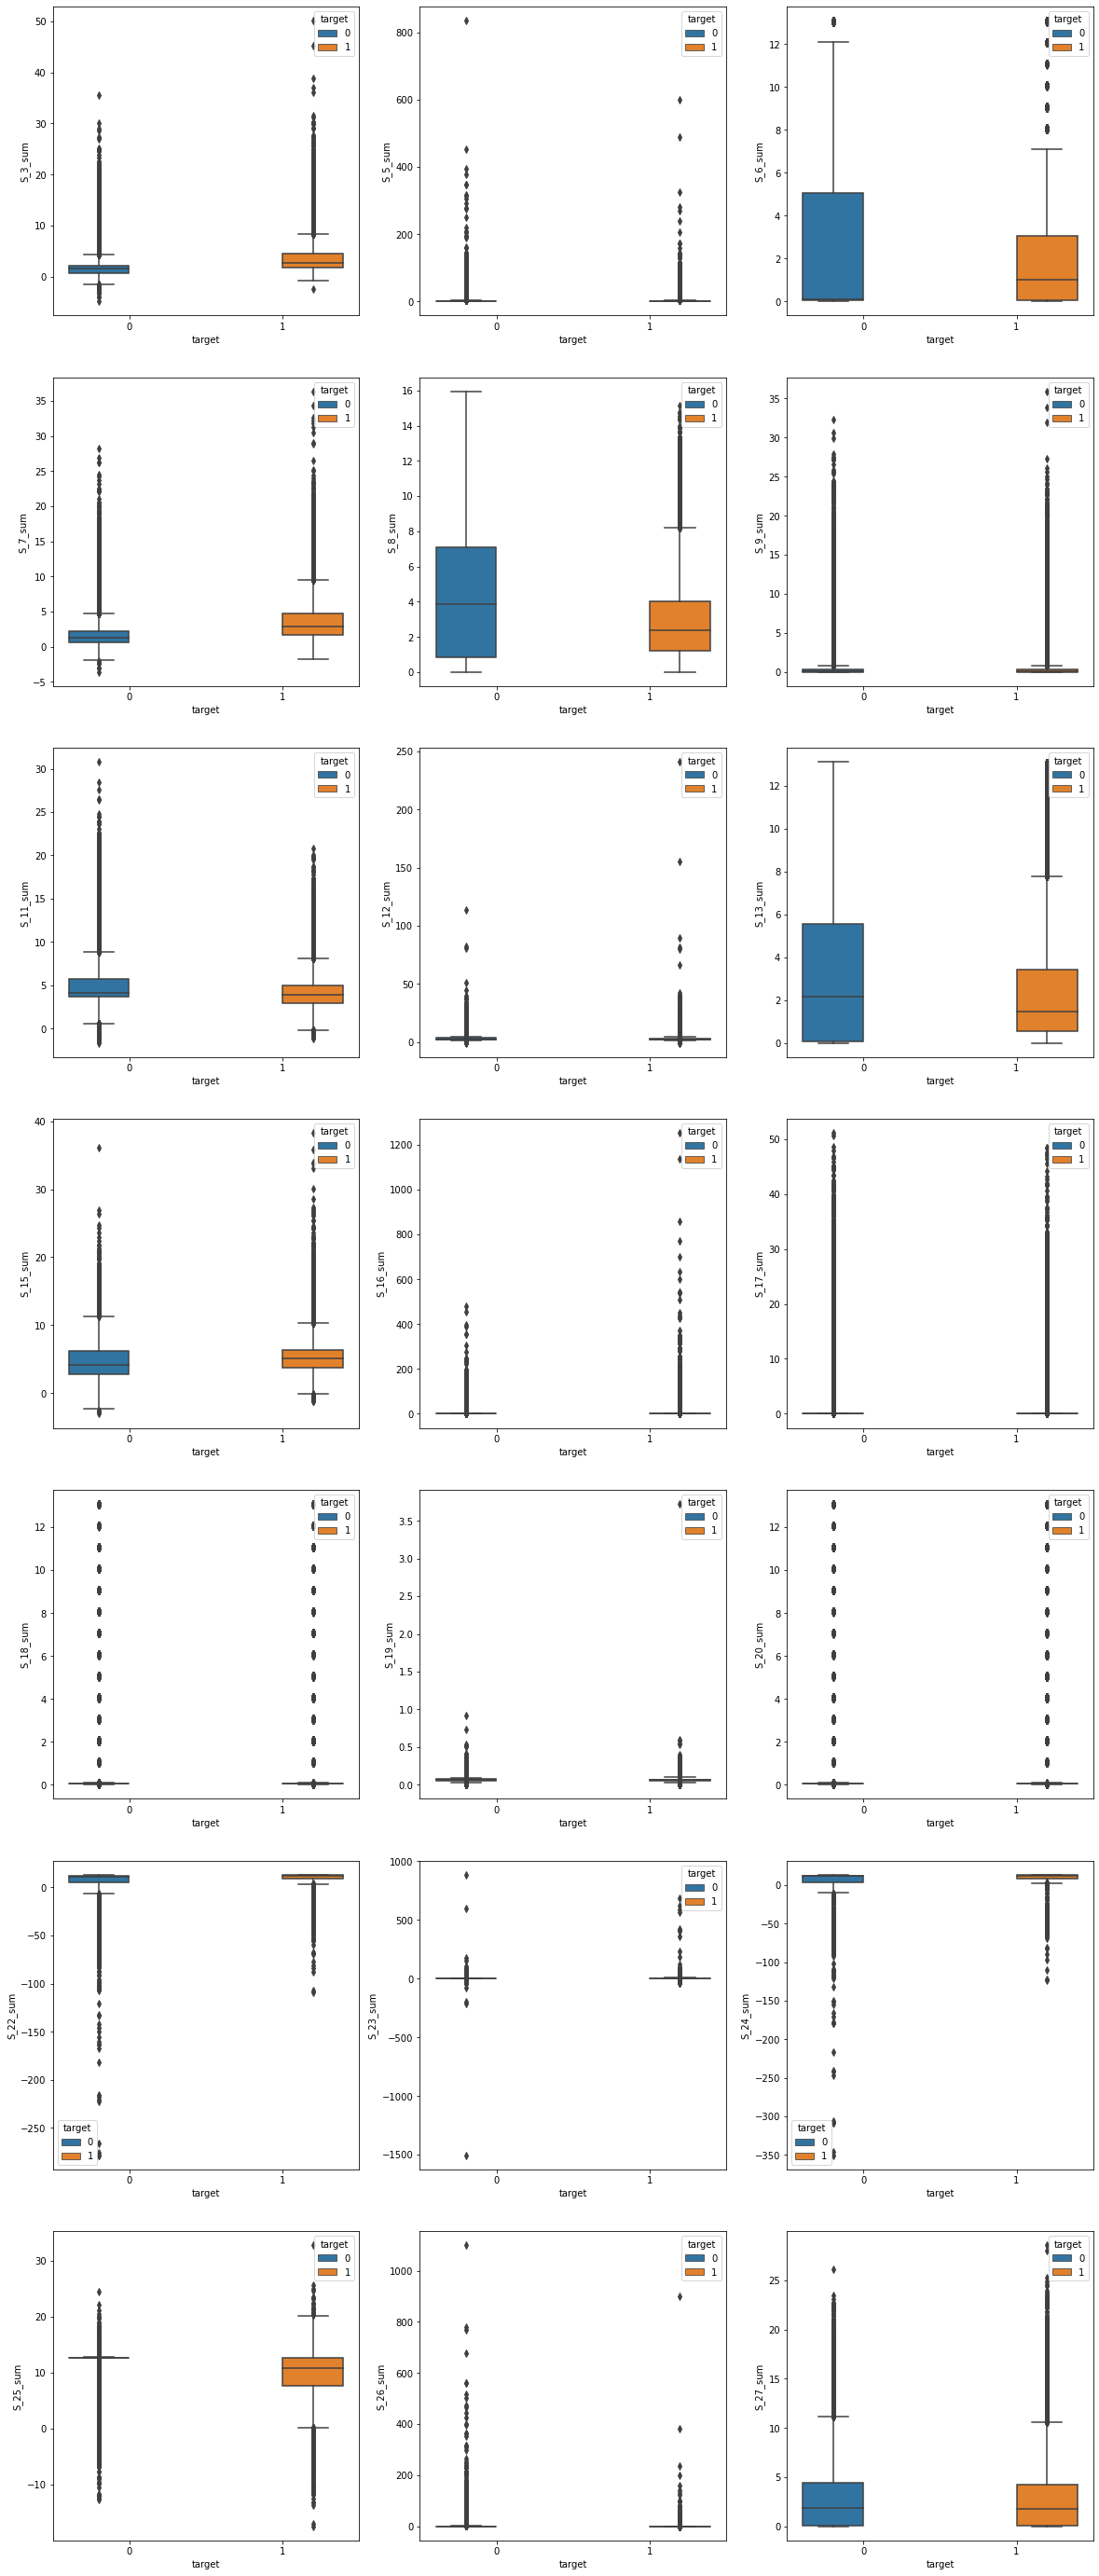

In [9]:
fig, axes = plt.subplots(7, 3, figsize = (20, 50))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[0, 2], x = 'target', y = 'S_6_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_7_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_8_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1, 2], x = 'target', y = 'S_9_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_11_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_12_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[2, 2], x = 'target', y = 'S_13_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_15_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_16_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[3, 2], x = 'target', y = 'S_17_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_18_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_19_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[4, 2], x = 'target', y = 'S_20_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_22_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_23_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[5, 2], x = 'target', y = 'S_24_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_25_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_26_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[6, 2], x = 'target', y = 'S_27_sum', hue = 'target', data = target_sums)

#### Standard Deviation:

<AxesSubplot:xlabel='target', ylabel='S_27_std'>

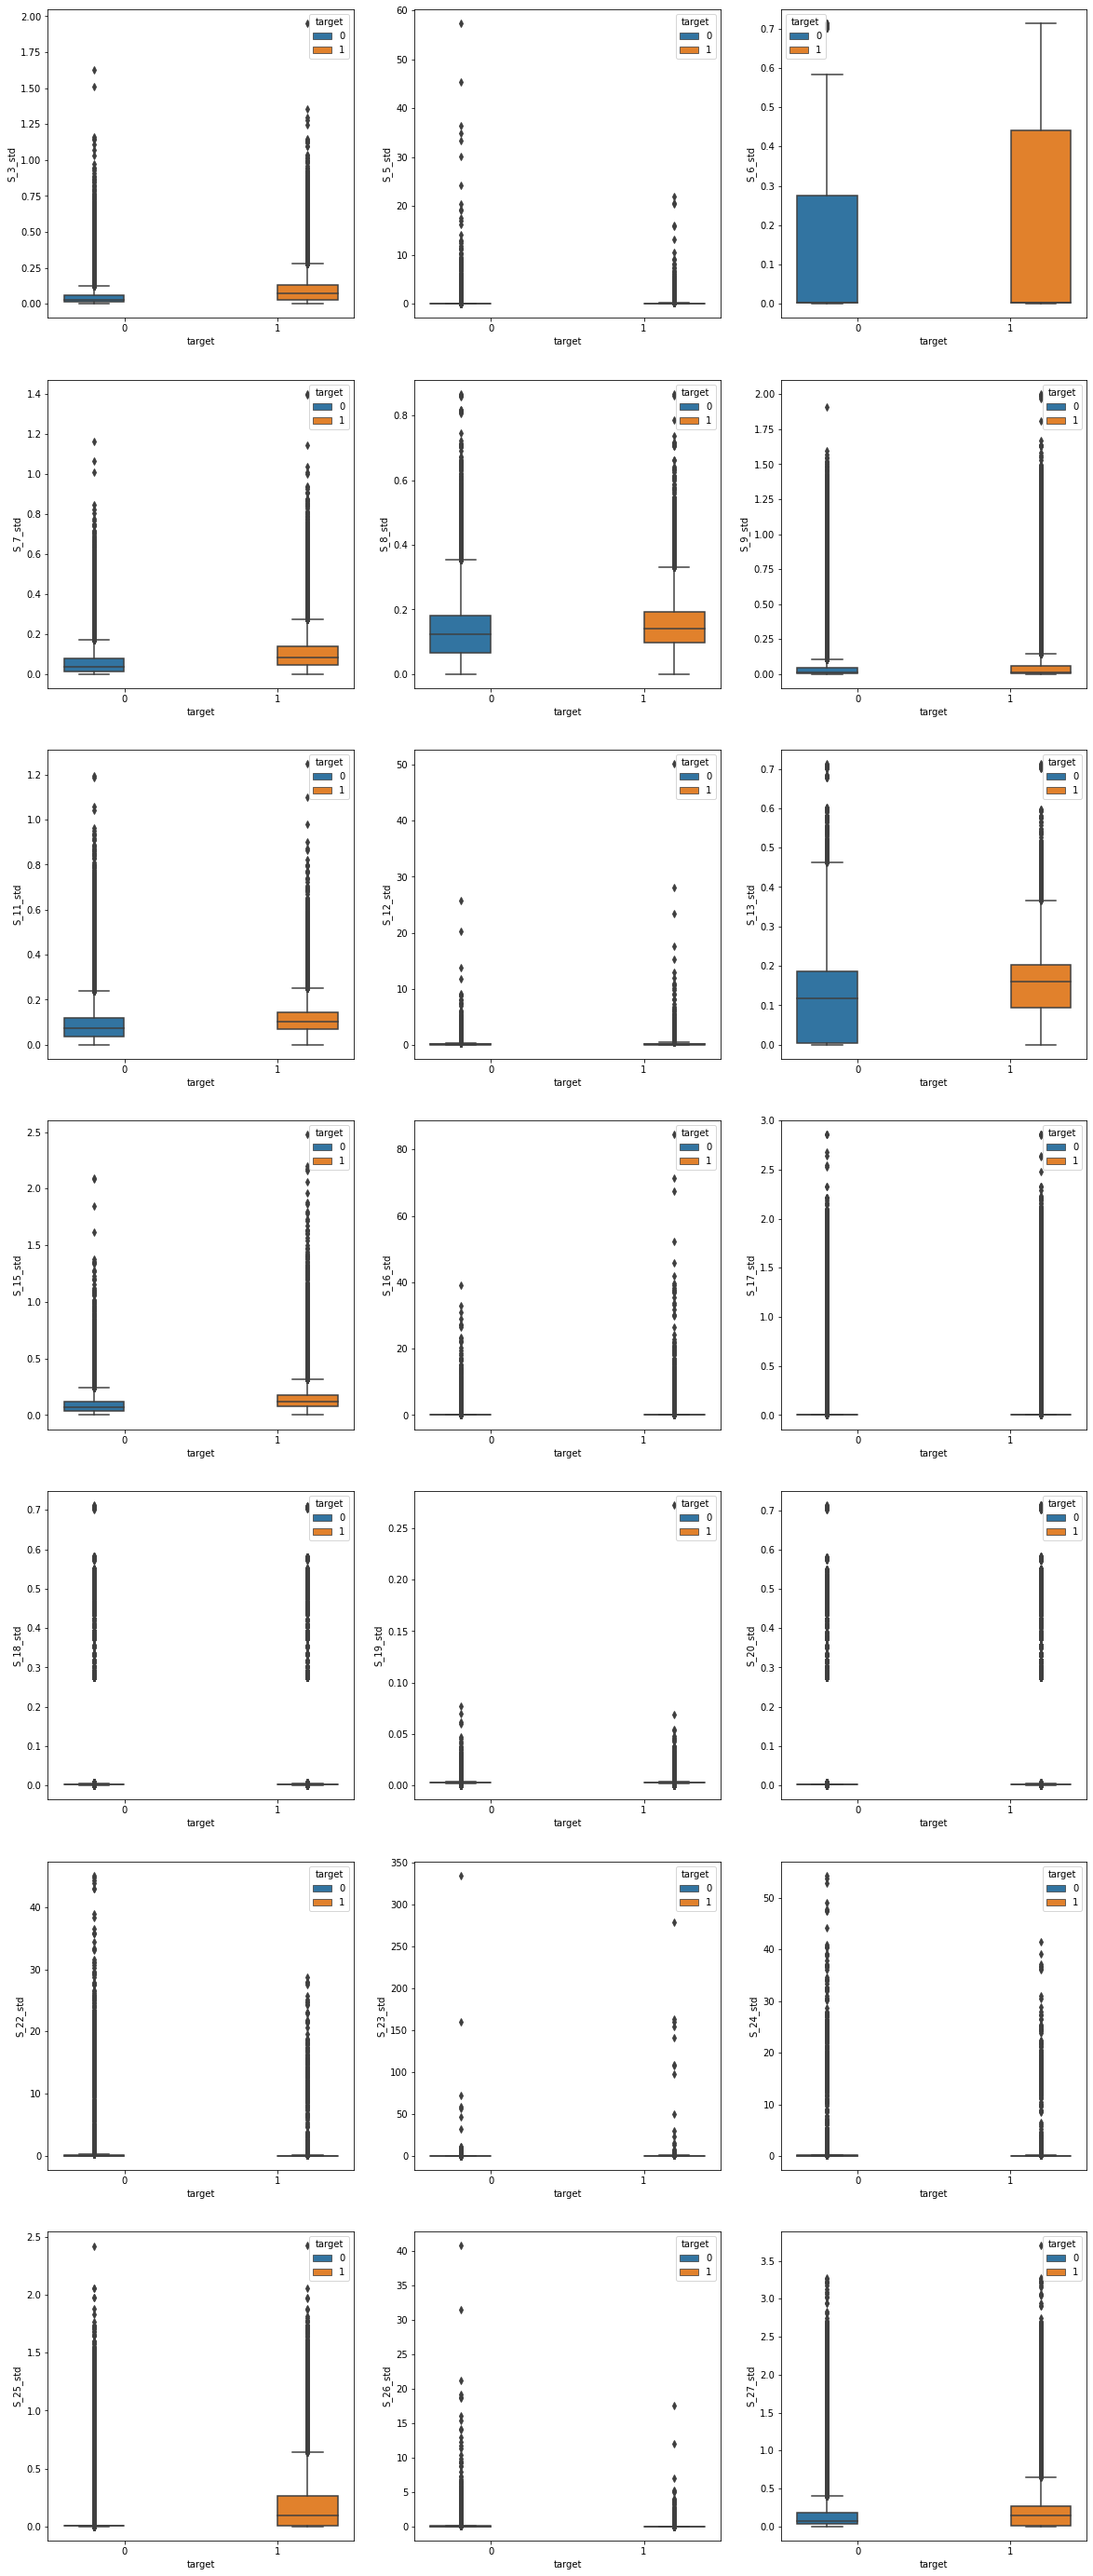

In [10]:
fig, axes = plt.subplots(7, 3, figsize = (20, 50))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[0, 2], x = 'target', y = 'S_6_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_7_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_8_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[1, 2], x = 'target', y = 'S_9_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_11_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_12_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[2, 2], x = 'target', y = 'S_13_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_15_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_16_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[3, 2], x = 'target', y = 'S_17_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_18_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_19_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[4, 2], x = 'target', y = 'S_20_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_22_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_23_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[5, 2], x = 'target', y = 'S_24_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_25_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_26_std', hue = 'target', data = target_stds)
sns.boxplot(ax = axes[6, 2], x = 'target', y = 'S_27_std', hue = 'target', data = target_stds)

#### MAD:

<AxesSubplot:xlabel='target', ylabel='S_27_mad'>

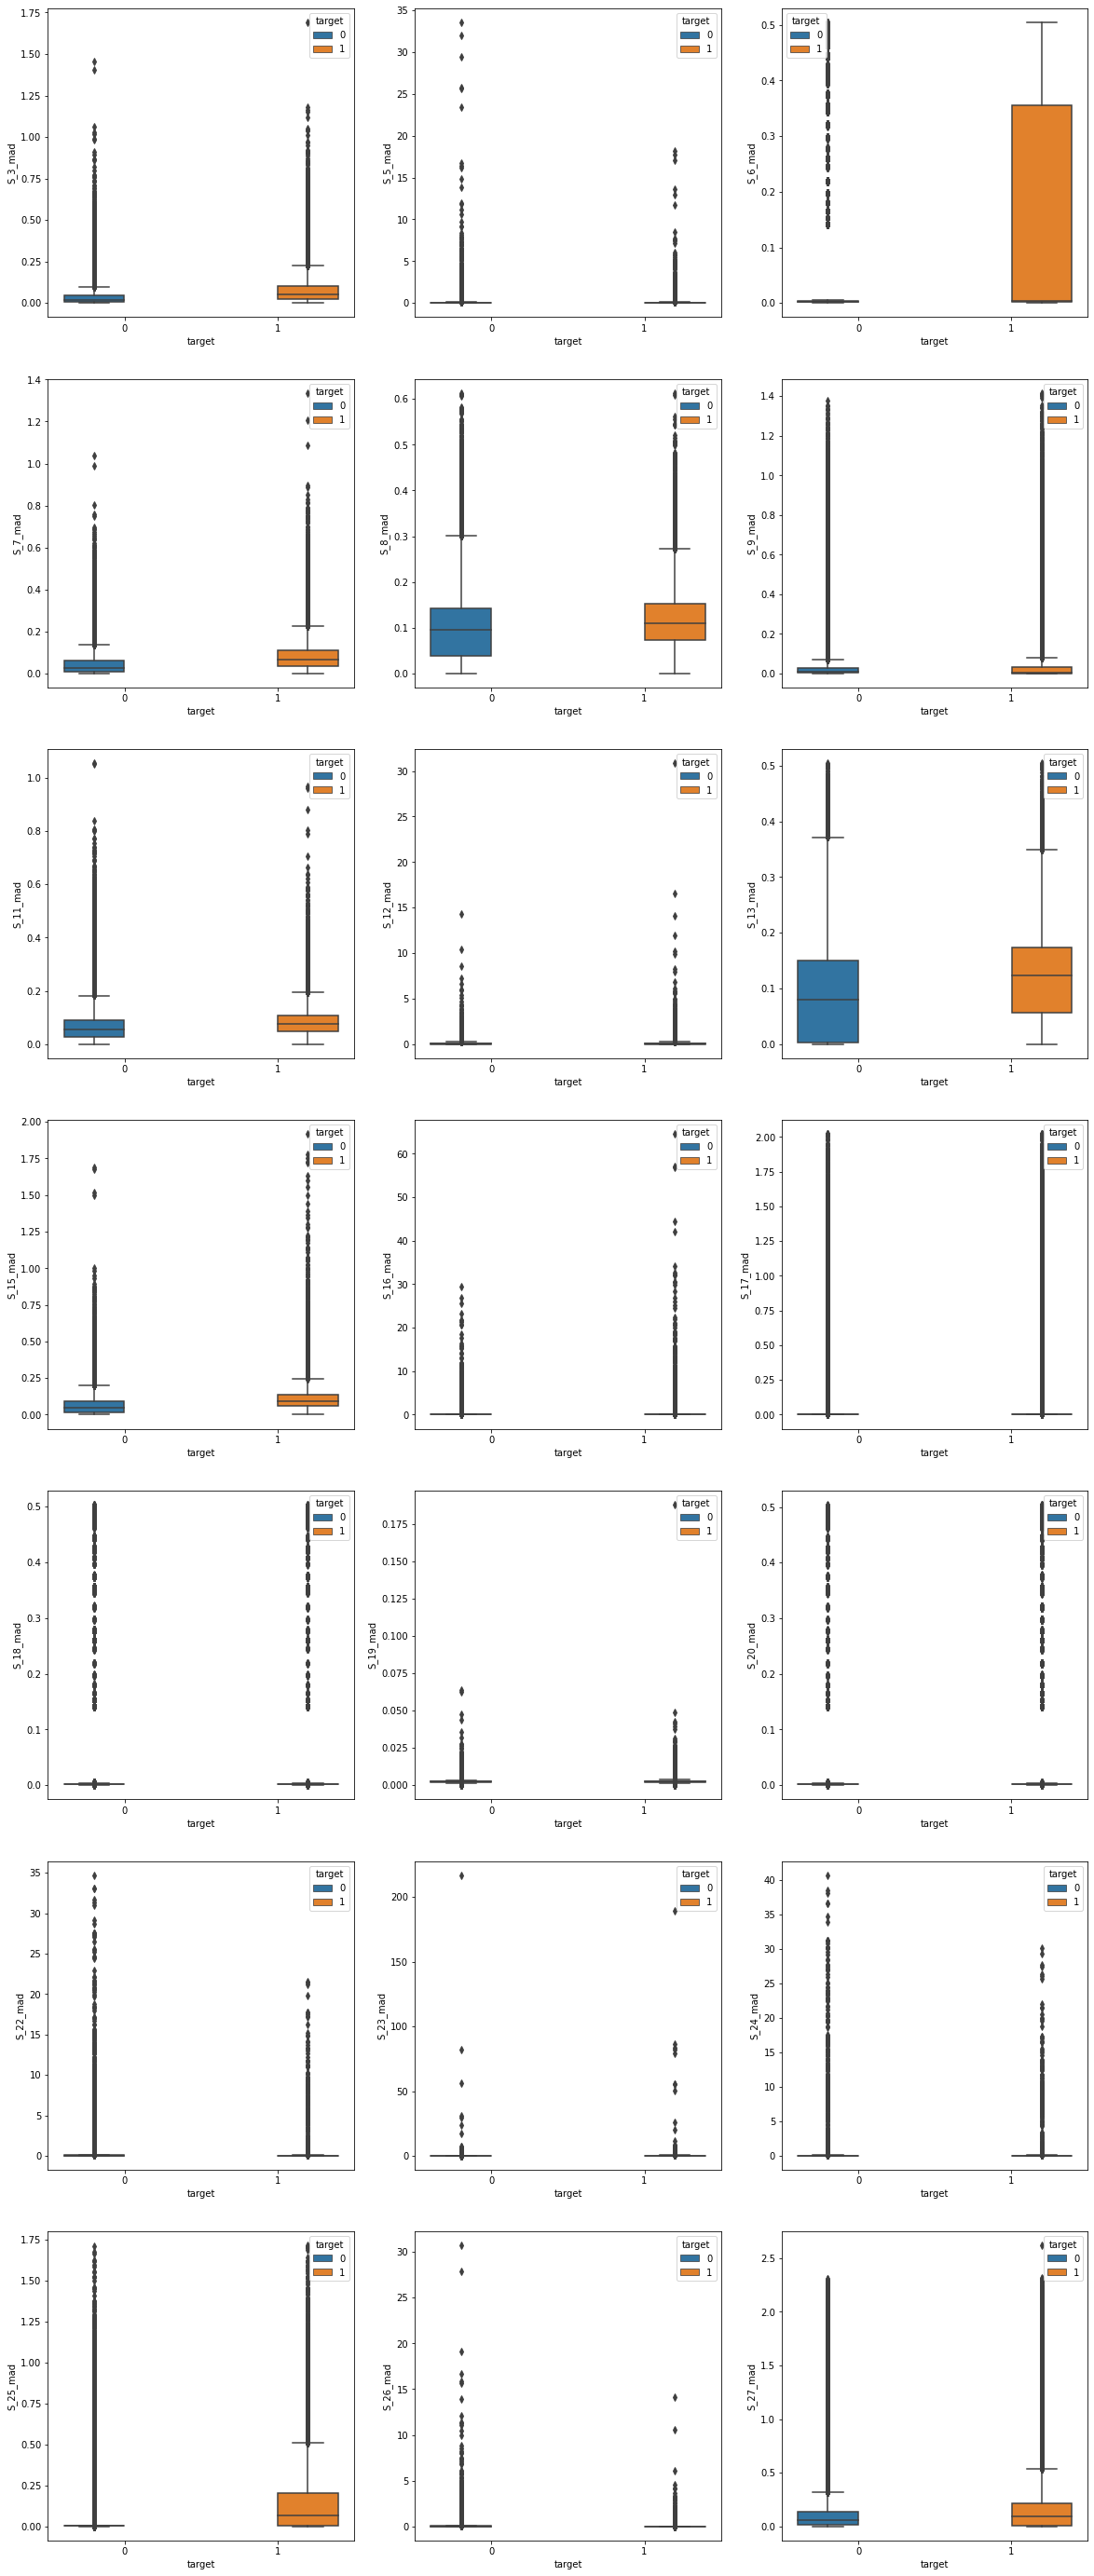

In [11]:
fig, axes = plt.subplots(7, 3, figsize = (20, 50))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[0, 2], x = 'target', y = 'S_6_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_7_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_8_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[1, 2], x = 'target', y = 'S_9_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_11_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_12_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[2, 2], x = 'target', y = 'S_13_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_15_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_16_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[3, 2], x = 'target', y = 'S_17_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_18_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_19_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[4, 2], x = 'target', y = 'S_20_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_22_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_23_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[5, 2], x = 'target', y = 'S_24_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_25_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_26_mad', hue = 'target', data = target_mads)
sns.boxplot(ax = axes[6, 2], x = 'target', y = 'S_27_mad', hue = 'target', data = target_mads)

#### Count:

<AxesSubplot:xlabel='target', ylabel='S_27_count'>

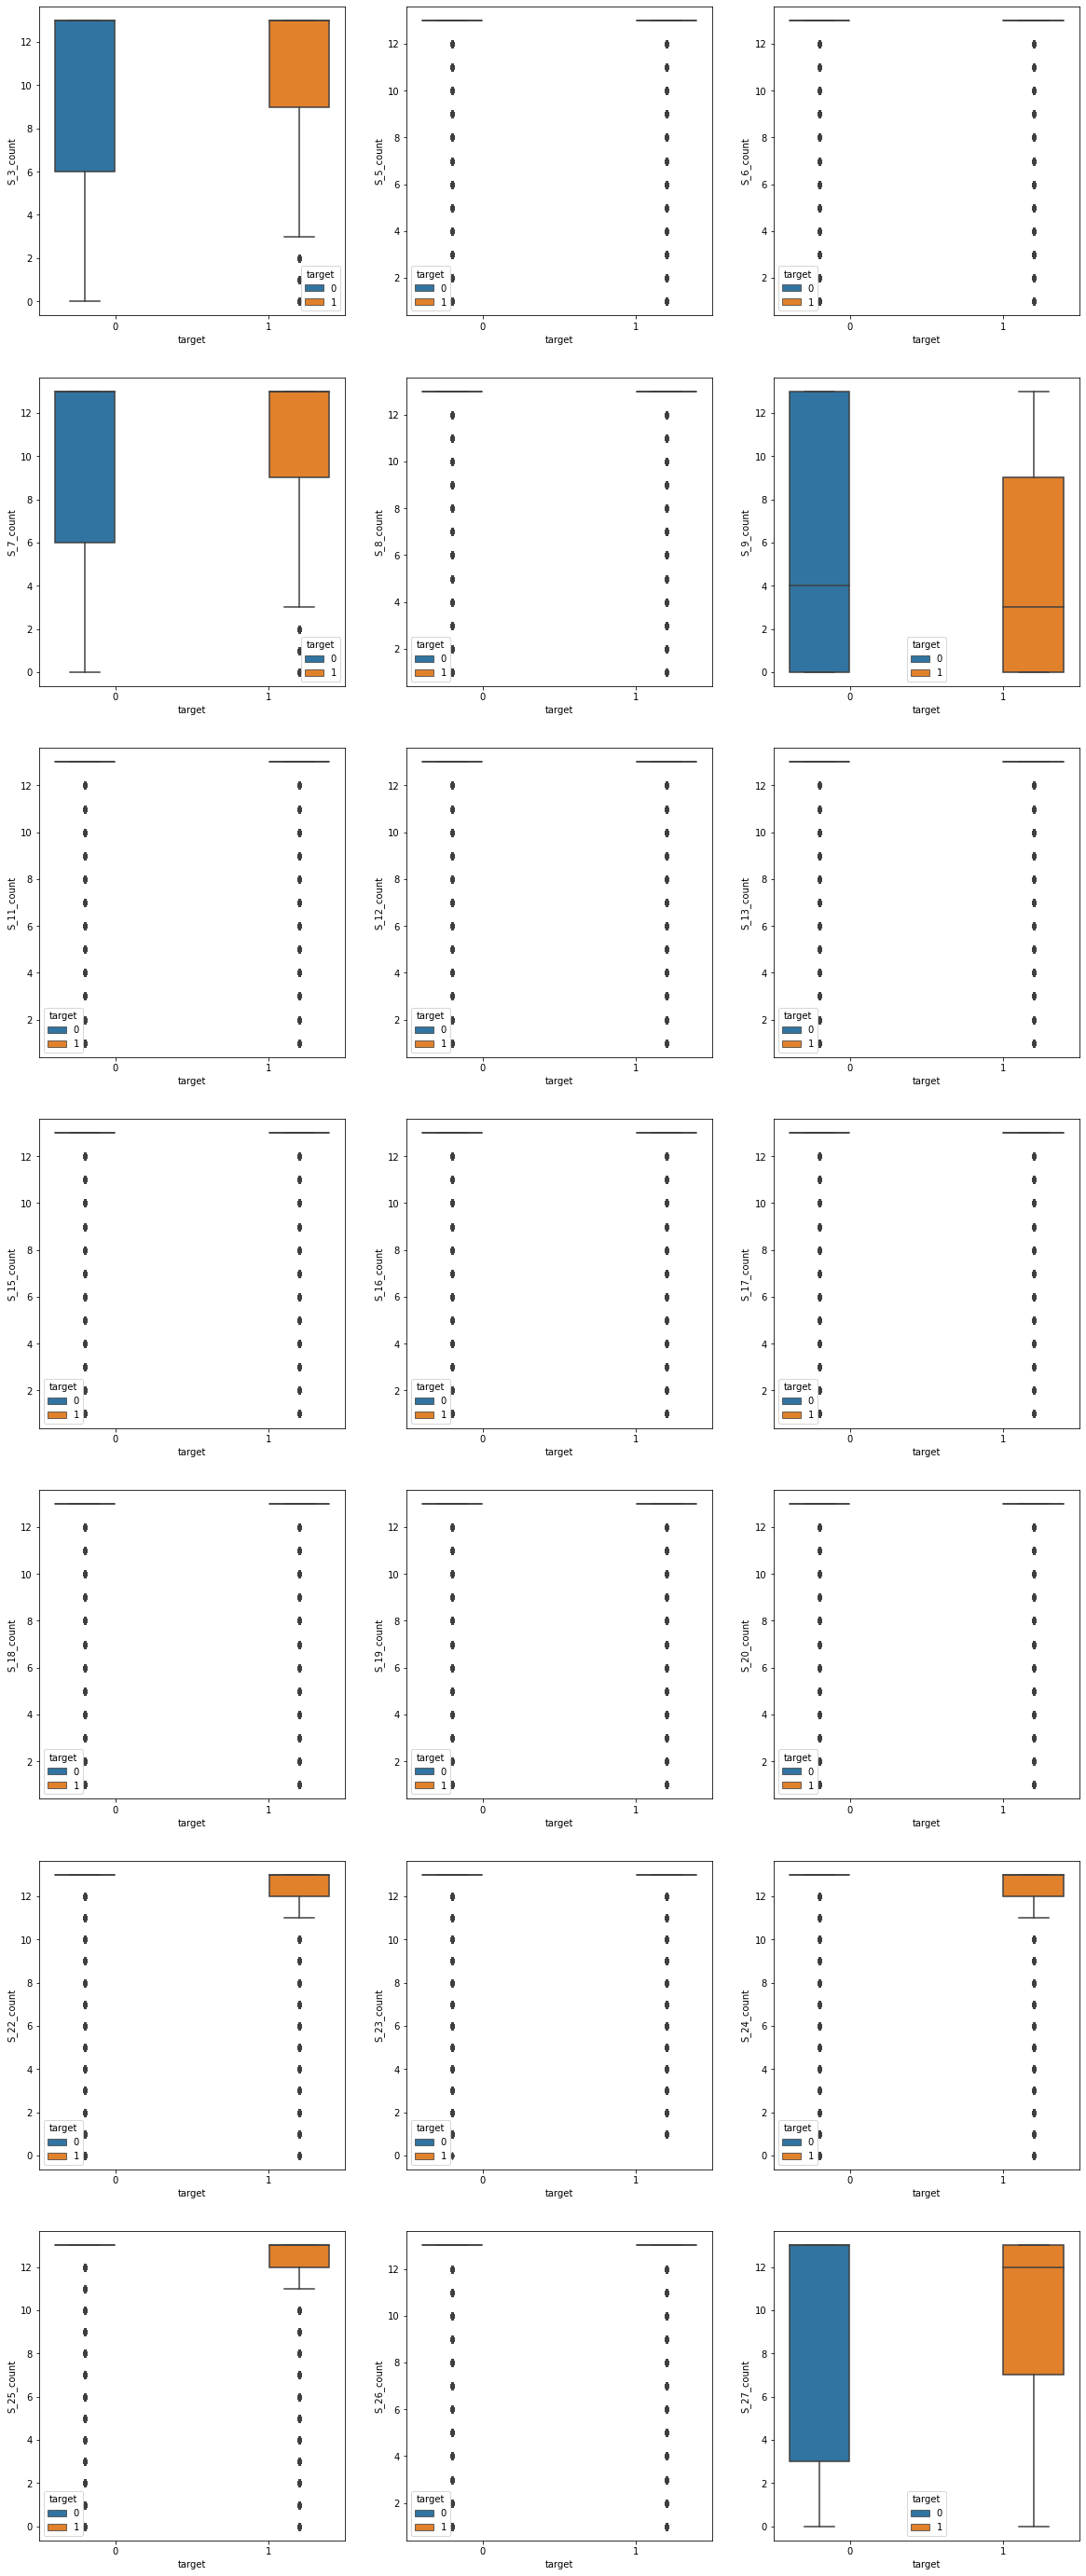

In [12]:
fig, axes = plt.subplots(7, 3, figsize = (20, 50))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[0, 2], x = 'target', y = 'S_6_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_7_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_8_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[1, 2], x = 'target', y = 'S_9_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_11_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_12_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[2, 2], x = 'target', y = 'S_13_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_15_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_16_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[3, 2], x = 'target', y = 'S_17_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_18_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_19_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[4, 2], x = 'target', y = 'S_20_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_22_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_23_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[5, 2], x = 'target', y = 'S_24_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_25_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_26_count', hue = 'target', data = target_counts)
sns.boxplot(ax = axes[6, 2], x = 'target', y = 'S_27_count', hue = 'target', data = target_counts)

#### Merging newly created variables into single data-frame:

In [21]:
## Creating a series of aggregation functions

def data_range(x):
    return x.max() - x.min()

def iqr(x):
    return np.percentile(x, 75) - np.percentile(x, 25)

def avg_pct_change(x):
    return pd.Series(x.to_list()).pct_change().mean()

def correlation(x):
    return pd.Series(x.values).corr(other = pd.Series(x.index), method = 'pearson')


## Creating new Payment and Spend features with the train data-frame

payment_vars_train = train.groupby('customer_ID').agg({'P_2':['mean', correlation], 
                                                       'P_3':['median', 'sum', avg_pct_change], 
                                                       'P_4':['sum', data_range, iqr]}).reset_index(drop = False)

spend_vars_train = train.groupby('customer_ID').agg({'S_3':['median'], 
                                                     'S_5':[data_range], 
                                                     'S_6':[avg_pct_change, correlation], 
                                                     'S_8':['mean', 'sum']}).reset_index(drop = False)

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [22]:
payment_vars_train.head()

customer_ID       P_2              \
                                                          mean correlation   
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.933594   -0.438767   
1  00000fd6641609c6ece5454664794f0340ad84dddce9a2...  0.899902   -0.854416   
2  00001b22f846c82c51f6e3958ccd81970162bae8b007e8...  0.878418   -0.109422   
3  000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  0.599121    0.953176   
4  00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...  0.891602   -0.597527   

        P_3                                P_4                       
     median       sum avg_pct_change       sum data_range       iqr  
0  0.689941  8.843750      -0.009858  0.073730   0.008675  0.003391  
1  0.570801  7.367188      -0.004892  0.069214   0.008408  0.005623  
2  0.629883  8.039062       0.023492  0.079468   0.008690  0.004696  
3  0.623047  7.941406       0.052205  0.061737   0.007771  0.005285  
4  0.560059  6.855469       0.044888  0.050140   0.009506  0.005409

In [25]:
payment_vars_train.columns

MultiIndex([('customer_ID',               ''),
            (        'P_2',           'mean'),
            (        'P_2',    'correlation'),
            (        'P_3',         'median'),
            (        'P_3',            'sum'),
            (        'P_3', 'avg_pct_change'),
            (        'P_4',            'sum'),
            (        'P_4',     'data_range'),
            (        'P_4',            'iqr')],
           )

In [26]:
payment_vars_train.shape

(458913, 9)

In [23]:
spend_vars_train.head()

customer_ID       S_3        S_5  \
                                                        median data_range   
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.110962   0.047058   
1  00000fd6641609c6ece5454664794f0340ad84dddce9a2...  0.120483   0.050903   
2  00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       NaN   0.007675   
3  000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  0.228149   0.147827   
4  00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...  0.174805   0.006966   

             S_6                   S_8             
  avg_pct_change correlation      mean        sum  
0       0.728859   -0.061375  0.796875  10.359375  
1       9.516905   -0.178619  0.411133   5.343750  
2      -0.000479   -0.276313  0.006432   0.083618  
3       0.550672    0.101124  0.308594   4.011719  
4       9.883152    0.630128  0.053467   0.694824

In [27]:
spend_vars_train.columns

MultiIndex([('customer_ID',               ''),
            (        'S_3',         'median'),
            (        'S_5',     'data_range'),
            (        'S_6', 'avg_pct_change'),
            (        'S_6',    'correlation'),
            (        'S_8',           'mean'),
            (        'S_8',            'sum')],
           )

In [28]:
spend_vars_train.shape

(458913, 7)

In [24]:
training = payment_vars_train.merge(spend_vars_train, how = 'left', on = 'customer_ID')
training.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


customer_ID       P_2              \
                                                          mean correlation   
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.933594   -0.438767   
1  00000fd6641609c6ece5454664794f0340ad84dddce9a2...  0.899902   -0.854416   
2  00001b22f846c82c51f6e3958ccd81970162bae8b007e8...  0.878418   -0.109422   
3  000041bdba6ecadd89a52d11886e8eaaec9325906c9723...  0.599121    0.953176   
4  00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...  0.891602   -0.597527   

        P_3                                P_4                            S_3  \
     median       sum avg_pct_change       sum data_range       iqr    median   
0  0.689941  8.843750      -0.009858  0.073730   0.008675  0.003391  0.110962   
1  0.570801  7.367188      -0.004892  0.069214   0.008408  0.005623  0.120483   
2  0.629883  8.039062       0.023492  0.079468   0.008690  0.004696       NaN   
3  0.623047  7.941406       0.052205  0.061737   0.007771  0.005285  0.228149   
4  0.560059  6.855469       0.044888  0.050140   0.009506  0.005409  0.174805   

         S_5            S_6                   S_8             
  data_range avg_pct_change correlation      mean        sum  
0   0.047058       0.728859   -0.061375  0.796875  10.359375  
1   0.050903       9.516905   -0.178619  0.411133   5.343750  
2   0.007675      -0.000479   -0.276313  0.006432   0.083618  
3   0.147827       0.550672    0.101124  0.308594   4.011719  
4   0.006966       9.883152    0.630128  0.053467   0.694824

In [30]:
new = training.merge(labels, on = 'customer_ID', how = 'left')
new.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,customer_ID,"(customer_ID, )","(P_2, mean)","(P_2, correlation)","(P_3, median)","(P_3, sum)","(P_3, avg_pct_change)","(P_4, sum)","(P_4, data_range)","(P_4, iqr)","(S_3, median)","(S_5, data_range)","(S_6, avg_pct_change)","(S_6, correlation)","(S_8, mean)","(S_8, sum)",target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933594,-0.438767,0.689941,8.843750,-0.009858,0.073730,0.008675,0.003391,0.110962,0.047058,0.728859,-0.061375,0.796875,10.359375,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899902,-0.854416,0.570801,7.367188,-0.004892,0.069214,0.008408,0.005623,0.120483,0.050903,9.516905,-0.178619,0.411133,5.343750,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878418,-0.109422,0.629883,8.039062,0.023492,0.079468,0.008690,0.004696,NaN,0.007675,-0.000479,-0.276313,0.006432,0.083618,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.599121,0.953176,0.623047,7.941406,0.052205,0.061737,0.007771,0.005285,0.228149,0.147827,0.550672,0.101124,0.308594,4.011719,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891602,-0.597527,0.560059,6.855469,0.044888,0.050140,0.009506,0.005409,0.174805,0.006966,9.883152,0.630128,0.053467,0.694824,0


In [31]:
new['target'].value_counts()

0    340085
1    118828
Name: target, dtype: int64

In [29]:
training.columns

MultiIndex([('customer_ID',               ''),
            (        'P_2',           'mean'),
            (        'P_2',    'correlation'),
            (        'P_3',         'median'),
            (        'P_3',            'sum'),
            (        'P_3', 'avg_pct_change'),
            (        'P_4',            'sum'),
            (        'P_4',     'data_range'),
            (        'P_4',            'iqr'),
            (        'S_3',         'median'),
            (        'S_5',     'data_range'),
            (        'S_6', 'avg_pct_change'),
            (        'S_6',    'correlation'),
            (        'S_8',           'mean'),
            (        'S_8',            'sum')],
           )

### Variable Importance

In [ ]:
## Using the train data-frame to engineer variable interactions

## Defining the input and target variables
X = train[['P_2', 'P_3', 'P_4', 'S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_11', 'S_12', 'S_13', 'S_15', 
           'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']]
Y = train['target']

## Defining a list to store results
results = []

## Repeating process 100 times
for i in tqdm(range(0, 5)):
    
    ## Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, stratify = Y)
    
    ## Building the model
    rf_md = RandomForestClassifier(max_depth = 3, n_estimators = 100).fit(X_train, Y_train)
    
    ## Extracting feature importance scores
    results.append(rf_md.feature_importances_)
    
## Changing results list to a dataframe
results = pd.DataFrame(results, columns = X.columns)

## Computing averages and sorting variables by importance
results = pd.DataFrame(results.apply(np.mean, axis = 0))
results = pd.DataFrame({'Feature': results.index, 'Importance': results[0].values}).sort_values(by = 'Importance', ascending = False)

results